In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.ml.stat import Correlation


#pd.set_option('display.max_columns', None)

spark = spark = SparkSession \
    .builder \
    .appName("CCproject") \
    .getOrCreate()

In [23]:
circuits_schema= StructType([
    StructField("circuitId", IntegerType(), True),
    StructField("circuitRef", StringType(), True),
    StructField("name", StringType(), True),
    StructField("location", StringType(), True),
    StructField("country", StringType(), True),
    StructField("lat", DoubleType(), True),
    StructField("lng", DoubleType(), True),
    StructField("alt", IntegerType(), True),
    StructField("url", StringType(), True)
])
    
drivers_schema= StructType([
    StructField("driverId", IntegerType(), True),
    StructField("driverRef", StringType(), True),
    StructField("number", IntegerType(), True),
    StructField("code", StringType(), True),
    StructField("forename", StringType(), True),
    StructField("surname", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("nationality", StringType(), True),
    StructField("url", StringType(), True)
])

driver_standings_schema= StructType([
    StructField("driverStandingsId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("driverId", IntegerType(), True),
    StructField("points", DoubleType(), True),
    StructField("position", IntegerType(), True),
    StructField("positionText", StringType(), True),
    StructField("wins", IntegerType(), True)
])

quali_schema= StructType([
    StructField("qualifyId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("driverId", IntegerType(), True),
    StructField("constructorId", IntegerType(), True),
    StructField("number", IntegerType(), True),
    StructField("position", IntegerType(), True),
    StructField("q1", StringType(), True),
    StructField("q2", StringType(), True),
    StructField("q3", StringType(), True)
])


pitstops_schema= StructType([
    StructField("raceId", IntegerType(), True),
    StructField("driverId", IntegerType(), True),
    StructField("stop", IntegerType(), True),
    StructField("lap", IntegerType(), True),
    StructField("time", StringType(), True),
    StructField("duration", StringType(), True),
    StructField("milliseconds", IntegerType(), True)
])

races_schema= StructType([
    StructField("raceId", IntegerType(), True),
    StructField("year", IntegerType(), True),
    StructField("round", IntegerType(), True),
    StructField("circuitId", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("date", DateType(), True),
    StructField("time", StringType(), True),
    StructField("url", StringType(), True),
    StructField("fp1_date", DateType(), True),
    StructField("fp1_time", StringType(), True),
    StructField("fp2_date", DateType(), True),
    StructField("fp2_time", StringType(), True),
    StructField("fp3_date", DateType(), True),
    StructField("fp3_time", StringType(), True),
    StructField("quali_date", DateType(), True),
    StructField("quali_time", StringType(), True),
    StructField("sprint_date", DateType(), True),
    StructField("sprint_time", StringType(), True)
])

results_schema= StructType([
    StructField("resultId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("driverId", IntegerType(), True),
    StructField("constructorId", IntegerType(), True),
    StructField("number", IntegerType(), True),
    StructField("grid", IntegerType(), True),
    StructField("position", IntegerType(), True),
    StructField("positionText", StringType(), True),
    StructField("positionOrder", IntegerType(), True),
    StructField("points", DoubleType(), True),
    StructField("laps", IntegerType(), True),
    StructField("time", StringType(), True),
    StructField("milliseconds", IntegerType(), True),
    StructField("fastestLap", IntegerType(), True),
    StructField("rank", IntegerType(), True),
    StructField("fastestLapTime", StringType(), True),
    StructField("fastestLapSpeed", StringType(), True),
    StructField("statusId", IntegerType(), True)
])

constructor_standings_schema= StructType([
    StructField("constructorStandingsId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("constructorId", IntegerType(), True),
    StructField("points", DoubleType(), True),
    StructField("position", IntegerType(), True),
    StructField("positionText", StringType(), True),
    StructField("wins", IntegerType(), True)
])

constructor_results_schema= StructType([
    StructField("constructorResultsId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("constructorId", IntegerType(), True),
    StructField("points", IntegerType(), True),
    StructField("status", StringType(), True)
])

constructors_schema= StructType([
    StructField("constructorId", IntegerType(), True),
    StructField("constructorRef", StringType(), True),
    StructField("name", StringType(), True),
    StructField("nationality", StringType(), True),
    StructField("url", StringType(), True)
])

status_schema= StructType([
    StructField("statusId", IntegerType(), True),
    StructField("status", StringType(), True)
])


In [24]:
circuits= spark.read.csv("hdfs://namenode:8020/f1data/circuits.csv", header=True, schema=circuits_schema)
drivers= spark.read.csv("hdfs://namenode:8020/f1data/drivers.csv", header=True, schema=drivers_schema)
driver_standings= spark.read.csv("hdfs://namenode:8020/f1data/driver_standings.csv", header=True, schema=driver_standings_schema)
quali= spark.read.csv("hdfs://namenode:8020/f1data/qualifying.csv", header=True, schema=quali_schema)
pitstops= spark.read.csv("hdfs://namenode:8020/f1data/pit_stops.csv", header=True, schema=pitstops_schema)
races= spark.read.csv("hdfs://namenode:8020/f1data/races.csv", header=True, schema=races_schema)
results= spark.read.csv("hdfs://namenode:8020/f1data/results.csv", header=True, schema=results_schema)
constructor_standings= spark.read.csv("hdfs://namenode:8020/f1data/constructor_standings.csv", header=True, schema=constructor_standings_schema)
constructor_results= spark.read.csv("hdfs://namenode:8020/f1data/constructor_results.csv", header=True, schema=constructor_results_schema)
constructors= spark.read.csv("hdfs://namenode:8020/f1data/constructors.csv", header=True, schema=constructors_schema)
status= spark.read.csv("hdfs://namenode:8020/f1data/status.csv", header=True, schema=status_schema)

# EDA

1. Handling Missing Values and Cleaning the data:

<ipython-input-25-866c5155a5f1>:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


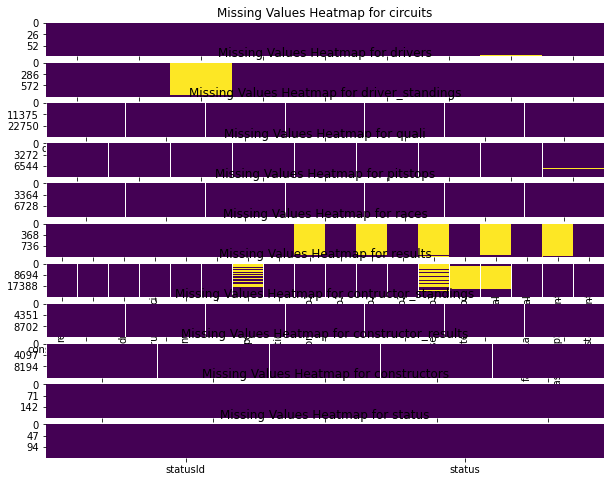

In [25]:
dataframes = [circuits, drivers, driver_standings, quali, pitstops, races, results, constructor_standings, constructor_results, constructors, status]
dataframe_names = ['circuits', 'drivers', 'driver_standings', 'quali', 'pitstops', 'races', 'results', 'contructor_standings', 'constructor_results', 'constructors', 'status']
fig, axes = plt.subplots(len(dataframes), 1, figsize=(10, 8))

for idx, (df, df_name) in enumerate(zip(dataframes, dataframe_names)):
    # Create a missing values DataFrame
    missing_values = df.select([col(c).isNull().alias(c) for c in df.columns])
    missing_values_pd = missing_values.toPandas()
    
    # Create a heatmap for missing values
    sns.heatmap(missing_values_pd, cmap='viridis', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'Missing Values Heatmap for {df_name}')

plt.tight_layout()
plt.show()

From the above diagram we can see that the following dataframes have missing values:
circuits, drivers, quali, races, results

Thus let's look at these in further detail:

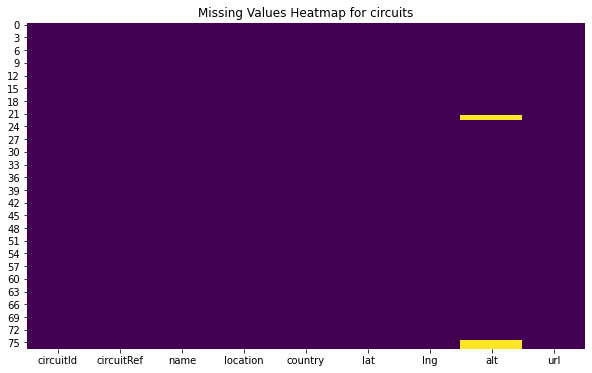

In [26]:
missing_values_circuits = circuits.select([col(c).isNull().alias(c) for c in circuits.columns])

# Convert the missing values DataFrame to Pandas
missing_values_pd_circuits = missing_values_circuits.toPandas()

# Create a missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd_circuits, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap for circuits')
plt.show()

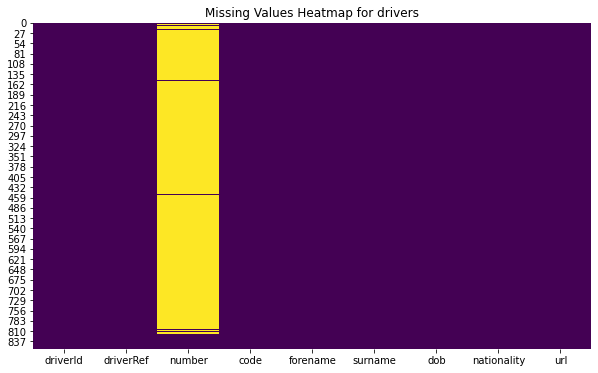

In [27]:
missing_values_drivers = drivers.select([col(c).isNull().alias(c) for c in drivers.columns])

# Convert the missing values DataFrame to Pandas
missing_values_pd_drivers = missing_values_drivers.toPandas()

# Create a missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd_drivers, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap for drivers')
plt.show()

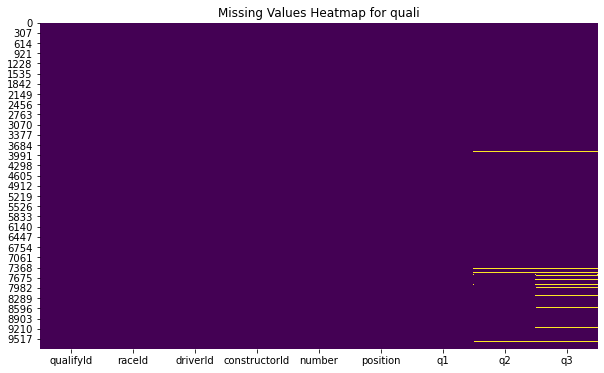

In [28]:
missing_values_quali = quali.select([col(c).isNull().alias(c) for c in quali.columns])

# Convert the missing values DataFrame to Pandas
missing_values_pd_quali = missing_values_quali.toPandas()

# Create a missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd_quali, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap for quali')
plt.show()

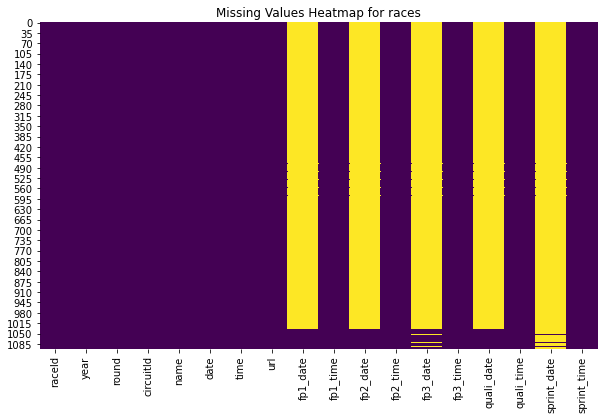

In [29]:
missing_values_races = races.select([col(c).isNull().alias(c) for c in races.columns])

# Convert the missing values DataFrame to Pandas
missing_values_pd_races = missing_values_races.toPandas()

# Create a missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd_races, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap for races')
plt.show()

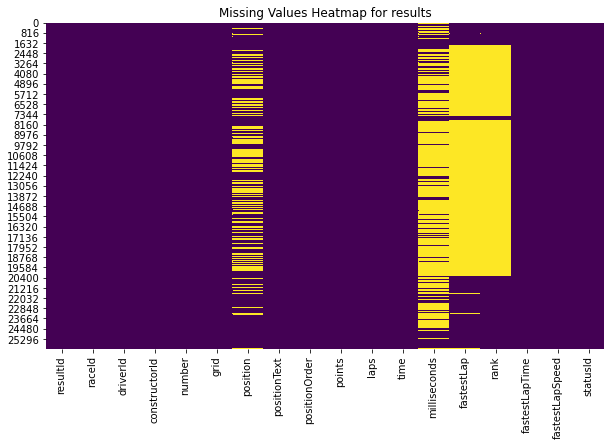

In [30]:
missing_values_results = results.select([col(c).isNull().alias(c) for c in results.columns])

# Convert the missing values DataFrame to Pandas
missing_values_pd_results = missing_values_results.toPandas()

# Create a missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd_results, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap for results')
plt.show()

All the columns containing missing values in the above data frames are not required for the EDA. Thus, we can delete these columns:

In [31]:
circuits= circuits.drop("alt")
drivers= drivers.drop("number")
quali= quali.drop("q2", "q3")
races= races.drop("fp1_date","fp1_time", "fp2_date", "fp2_time", "fp3_date", "fp3_time", "quali_date","quali_time", "sprint_date", "sprint_time")
results= results.drop("position", "milliseconds", "fastetst_Lap", "rank")

Now, as there are no missing values remaining, data imputation is not required

2. We can now begin finding the data trends between all the variables in the dataset: